In [95]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.forest import _generate_unsampled_indices
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score

sys.path.append('../')
from utils import utils

%matplotlib inline
sns.set_context('notebook')
plt.style.use('ggplot')

In [25]:
%load_ext autoreload
%autoreload 2

In [62]:
data = load_breast_cancer()
X = data['data']
y = data['target']
df = pd.DataFrame(np.concatenate([X, y.reshape(-1, 1)], axis=1),
                  columns=list(data['feature_names']) + ['target'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [16]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [65]:
# Split the data
df_train, df_test = train_test_split(df, test_size=0.2, random_state=123)

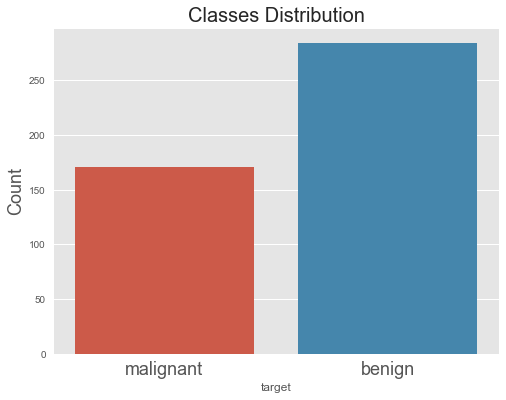

In [69]:
utils.plot_class_dist(df_train.target, x_labels=data['target_names'])

In [96]:
X_train = df_train.drop(columns=['target'], axis=1)
y_train = df_train['target']
X_test = df_test.drop(columns=['target'], axis=1)
y_test = df_test['target']

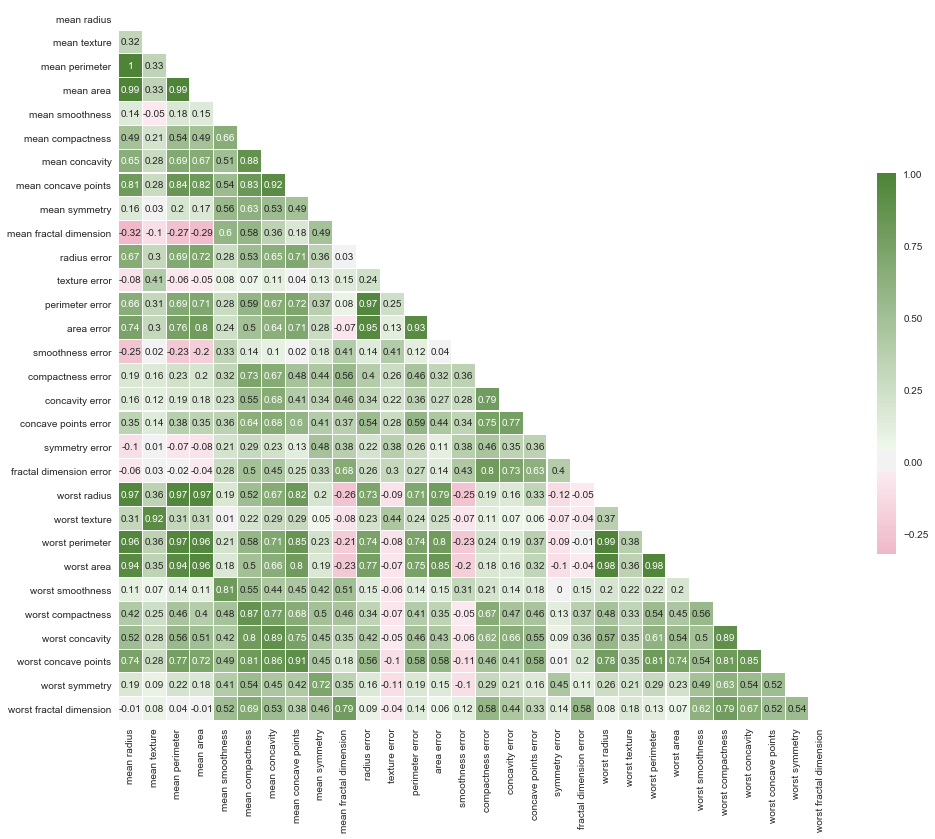

In [97]:
utils.plot_corr_matrix(X_train,
                       method='pearson', figsize=(16, 14))

In [86]:
utils.get_high_correlated_features(X_train, method='pearson', threshold=0.9)

['mean perimeter',
 'mean area',
 'mean concave points',
 'perimeter error',
 'area error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst concave points']

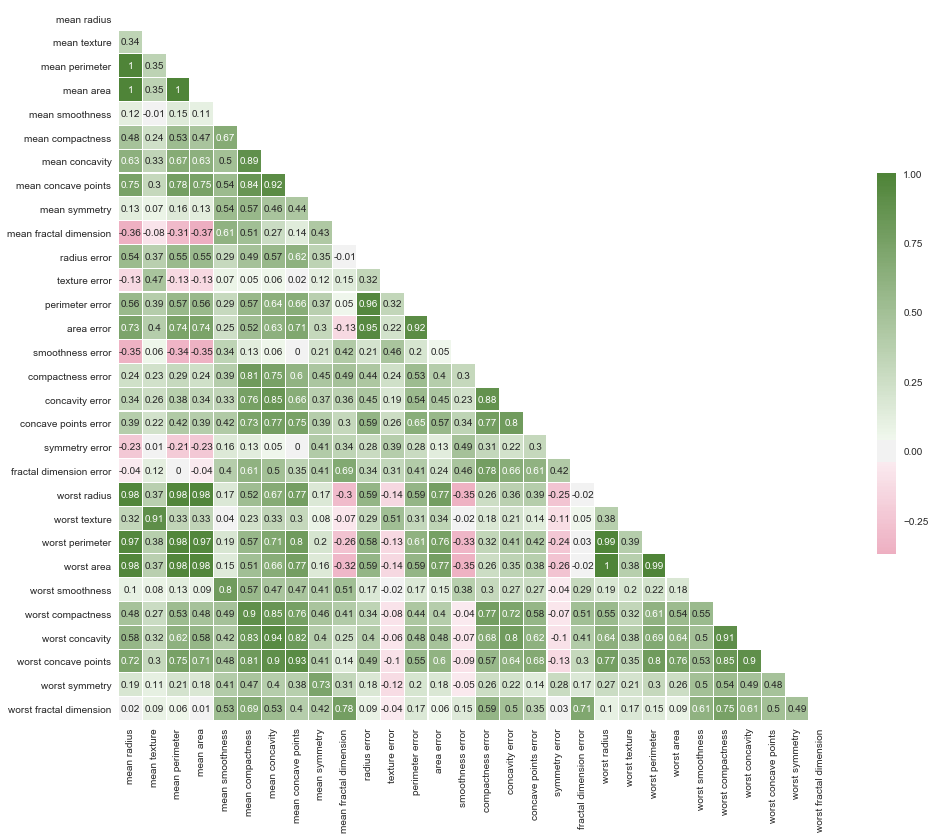

In [87]:
utils.plot_corr_matrix(X_train,
                       method='spearman', figsize=(16, 14))

In [88]:
utils.get_high_correlated_features(X_train, method='spearman', threshold=0.9)

['mean perimeter',
 'mean area',
 'mean concave points',
 'perimeter error',
 'area error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst compactness',
 'worst concavity',
 'worst concave points']

In [71]:
X_train = df_train.drop(columns=['target'], axis=1)
y_train = df_train['target']

In [93]:
# build a RF clf
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
k = 5
cv_error = cross_val_score(rf,
                            X_train, y_train,
                            cv=k,
                            scoring='roc_auc',
                            n_jobs=-1)

# Avg and std of CV error
avg_cv_error = cv_error.mean()
std_cv_error = cv_error.std()
print(f'{k}-folds CV AUC: {avg_cv_error:.4f} +/- {std_cv_error:.4f}')

5-folds CV AUC: 0.9870 +/- 0.0071


In [89]:
drop_features = utils.get_high_correlated_features(X_train, method='pearson', threshold=0.9)

In [90]:
drop_features

['mean perimeter',
 'mean area',
 'mean concave points',
 'perimeter error',
 'area error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst concave points']

In [94]:
# build a RF clf
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
k = 5
cv_error = cross_val_score(rf,
                            X_train.drop(columns=drop_features), y_train,
                            cv=k,
                            scoring='roc_auc',
                            n_jobs=-1)

# Avg and std of CV error
avg_cv_error = cv_error.mean()
std_cv_error = cv_error.std()
print(f'{k}-folds CV AUC: {avg_cv_error:.4f} +/- {std_cv_error:.4f}')

5-folds CV AUC: 0.9880 +/- 0.0088


In [102]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
roc_auc_score(y_test, rf.predict(X_test))

0.9878048780487805

In [105]:
rf.fit(X_train.drop(columns=drop_features), y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [108]:
roc_auc_score(y_test, rf.predict(X_test.drop(columns=drop_features)))

0.9634146341463415